In [2]:
from IPython.display import HTML, display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

files = [i for i in glob.glob('../input/*.{}'.format('csv'))]
dfs = list()
for csv in files:
    df = pd.read_csv(csv)
    df['country'] = csv[9:11]
    dfs.append(df)

my_df = pd.concat(dfs)
my_df = my_df.dropna()
to_int = ['views']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
my_df = my_df.drop_duplicates('video_id',keep='last').sort_values('views',ascending=False)
most_views_thumb = my_df['thumbnail_link'].head(100).reset_index()['thumbnail_link']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        #if c != COLUMN-1:
        tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
        #else:
            #tempHTML = '<img src="' + most_views_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
            #rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

#my_df.head()

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output

In [4]:
files = [i for i in glob.glob('../input/*.{}'.format('csv'))]
sorted(files)

['../input\\CAvideos.csv',
 '../input\\DEvideos.csv',
 '../input\\FRvideos.csv',
 '../input\\GBvideos.csv',
 '../input\\USvideos.csv']

In [5]:
dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[9:11]
    dfs.append(df)

my_df = pd.concat(dfs)
my_df.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [6]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
5x1FAiIq_pQ,2017-11-09,15:49:21
zy0b9e40tK8,2017-11-09,09:00:07
Y6eKxjMA9ek,2017-11-09,16:00:09
Q6Usd3_fbq8,2017-11-10,04:08:31
F-j_6IuaYfw,2017-11-08,21:05:20


In [7]:
my_df['category_id'] = my_df['category_id'].astype(str)
my_df_full['category_id'] = my_df['category_id'].astype(str)

category_id = {}

with open('../input/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

my_df.insert(4, 'category', my_df['category_id'].map(category_id))
my_df_full.insert(4, 'category', my_df_full['category_id'].map(category_id))
category_list = my_df['category'].unique()
category_list

array(['Music', 'Entertainment', 'Comedy', 'People & Blogs',
       'News & Politics', 'Howto & Style', 'Sports',
       'Science & Technology', 'Education', 'Autos & Vehicles',
       'Pets & Animals', 'Film & Animation', 'Gaming', 'Shows',
       'Travel & Events', 'Nonprofits & Activism'], dtype=object)

In [8]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

(      video_id country  title
 0  BhIEIO0vaBE      GB     36
 1  2z3EUY1aXdY      GB     36
 2  NooW_RbfdWI      GB     36
 3  tEnCoocmPQM      GB     35
 4  baj6llvgpWA      GB     35,           video_id country  title
 52307  _ex51a7Jfrs      CA      1
 52308  _eJyJe0ozwk      DE      1
 52309  _e34vV_faKg      CA      1
 52310  _dvlKul4Ppc      FR      1
 52311  --2K8l6BWfw      FR      1)

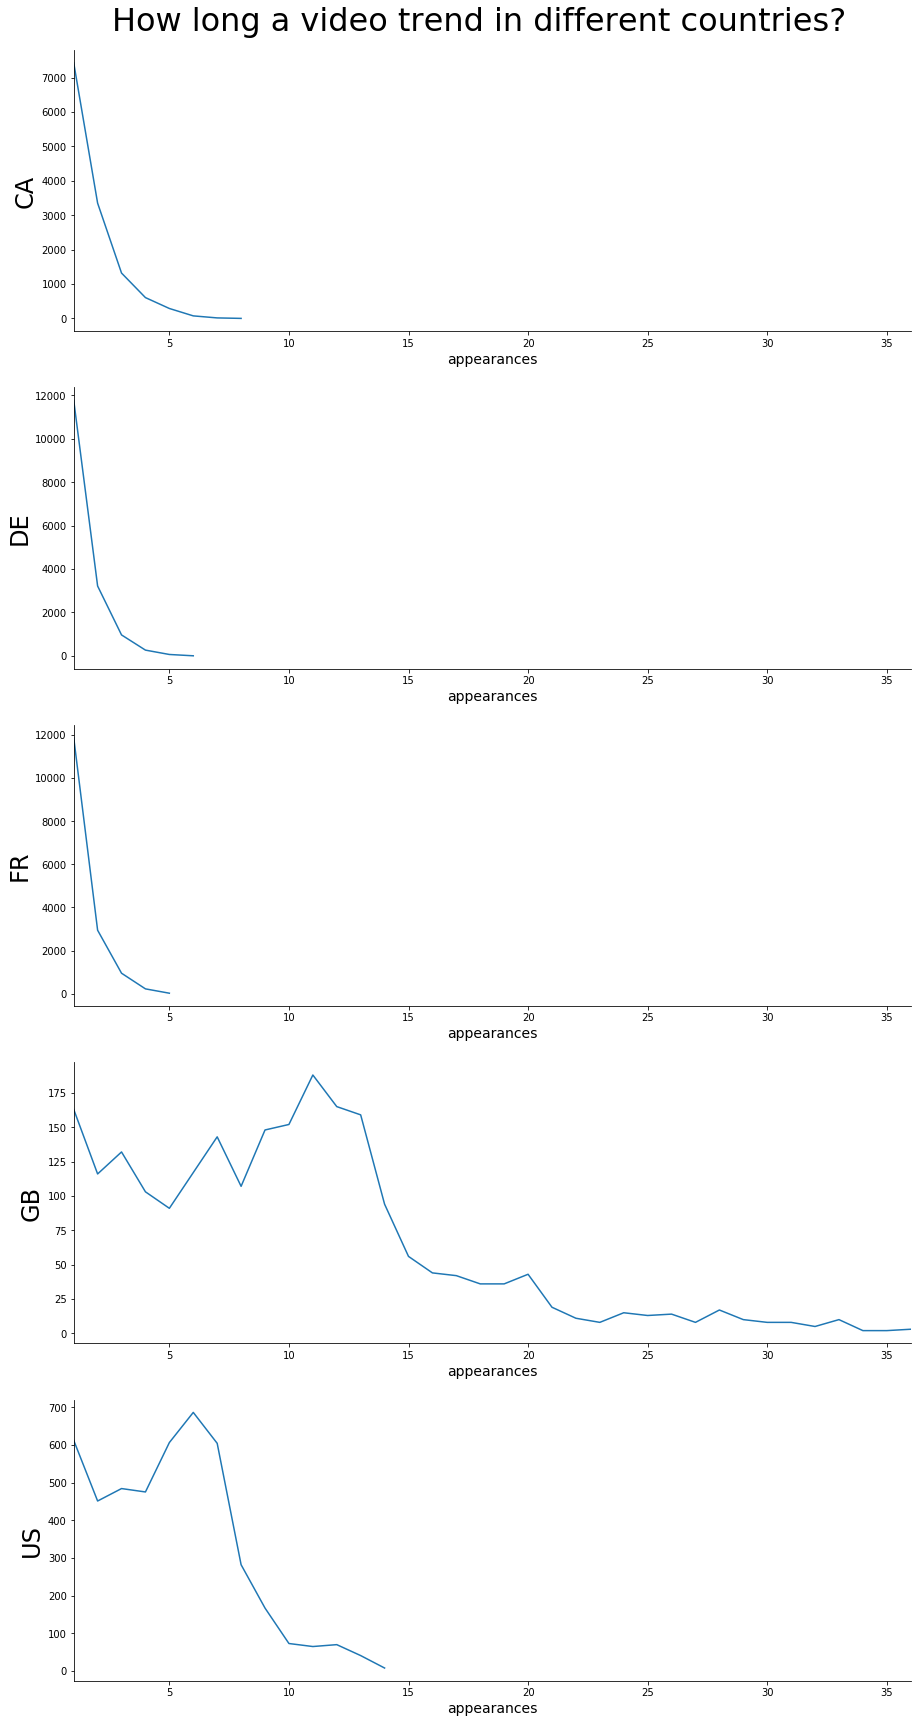

In [9]:
video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(15, 30))
st = fig.suptitle("How long a video trend in different countries?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

country
CA    10370
DE    13867
FR    14227
GB     2200
US     3817
Name: title, dtype: int64

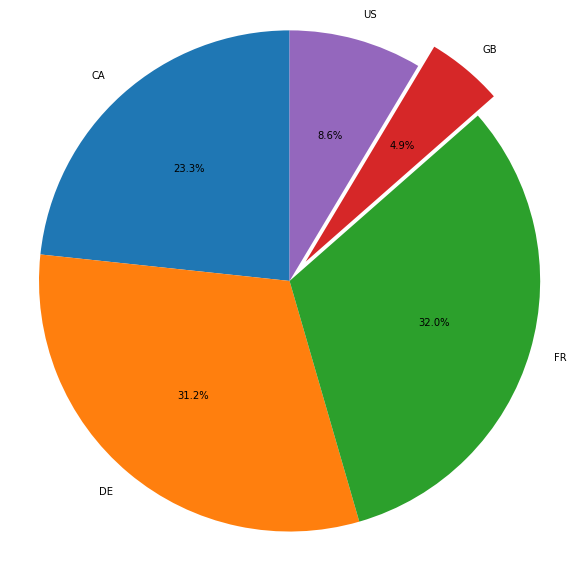

In [10]:
labels = my_df.groupby(['country']).count().index
sizes = my_df.groupby(['country']).count()['title']
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, explode=explode, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
sizes

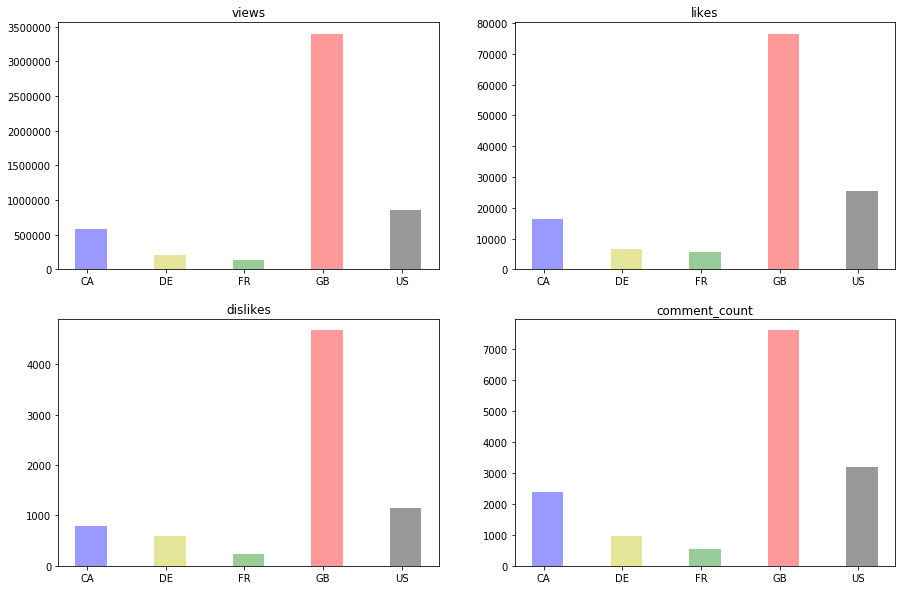

In [11]:
to_int = ['views', 'likes', 'dislikes', 'comment_count']
for column in to_int:
    my_df[column] = my_df[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(my_df[my_df['country']==c][typ].agg('sum')/len(my_df[my_df['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['b','y','g','r','k'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

Text(0.5, 1.0, 'Catogories of trend videos in United Kingdom')

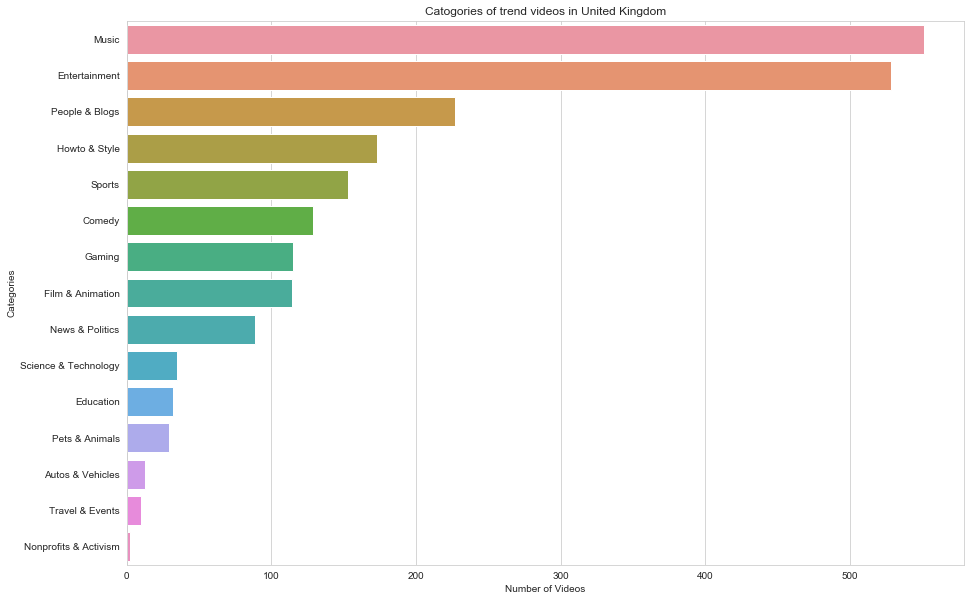

In [12]:
cat_df_gb = my_df[my_df['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
plt.xlabel("Number of Videos")## From United Kingdom users : 
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United Kingdom")

Text(0.5, 1.0, 'Catogories of trend videos in US')

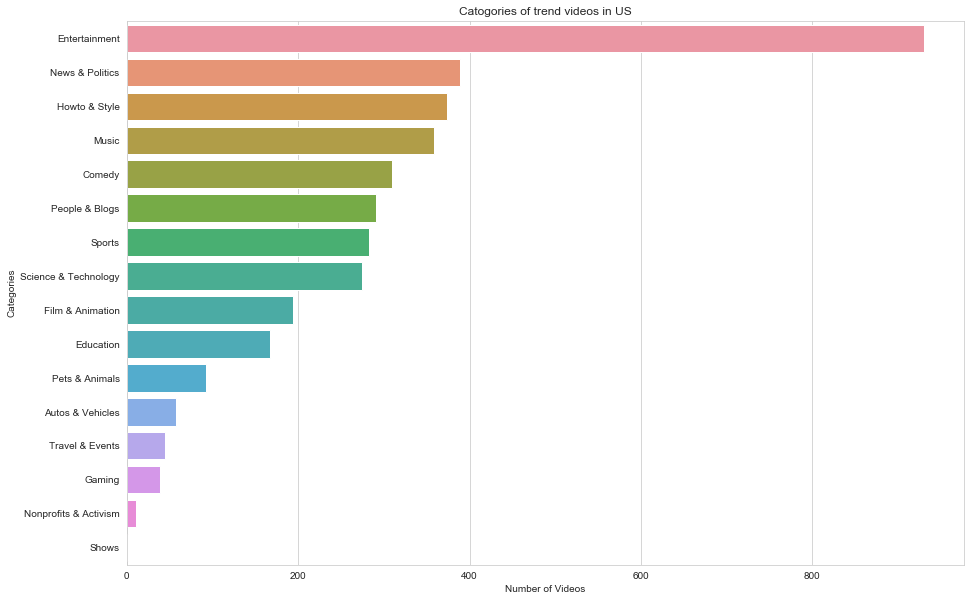

In [13]:
cat_df_us = my_df[my_df['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in US")

Text(0.5, 1.0, 'Catogories of trend videos in CANADA')

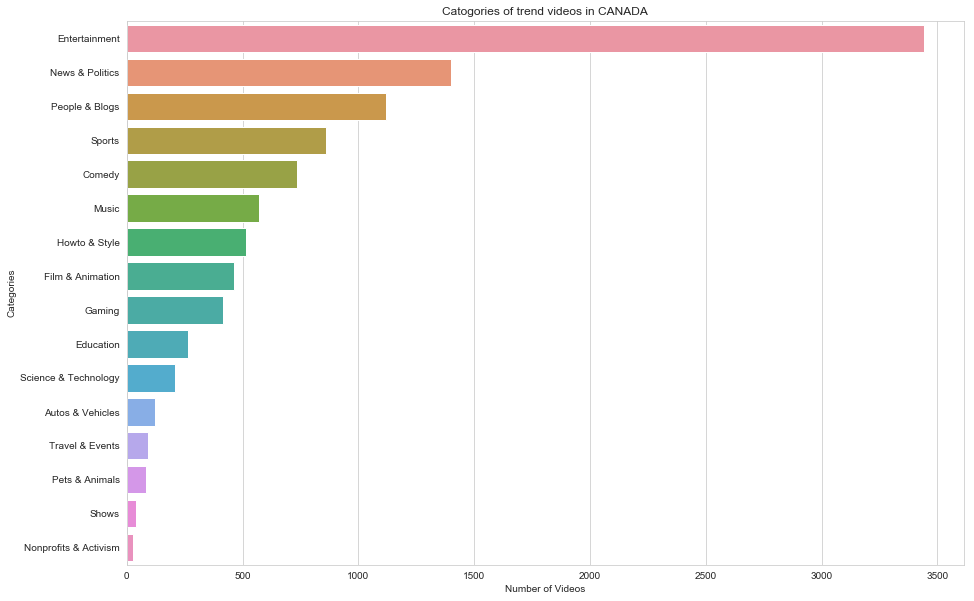

In [14]:
cat_df_ca = my_df[my_df['country']=='CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in CANADA")

Text(0.5, 1.0, 'Catogories of trend videos in GERMANY')

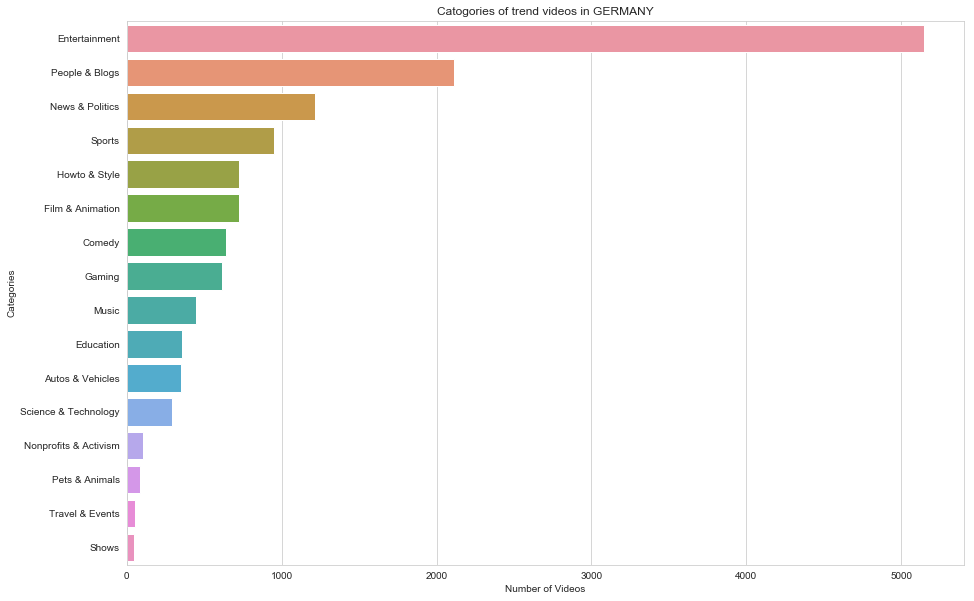

In [15]:
cat_df_de = my_df[my_df['country']=='DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in GERMANY")

Text(0.5, 1.0, 'Catogories of trend videos in FRANCE')

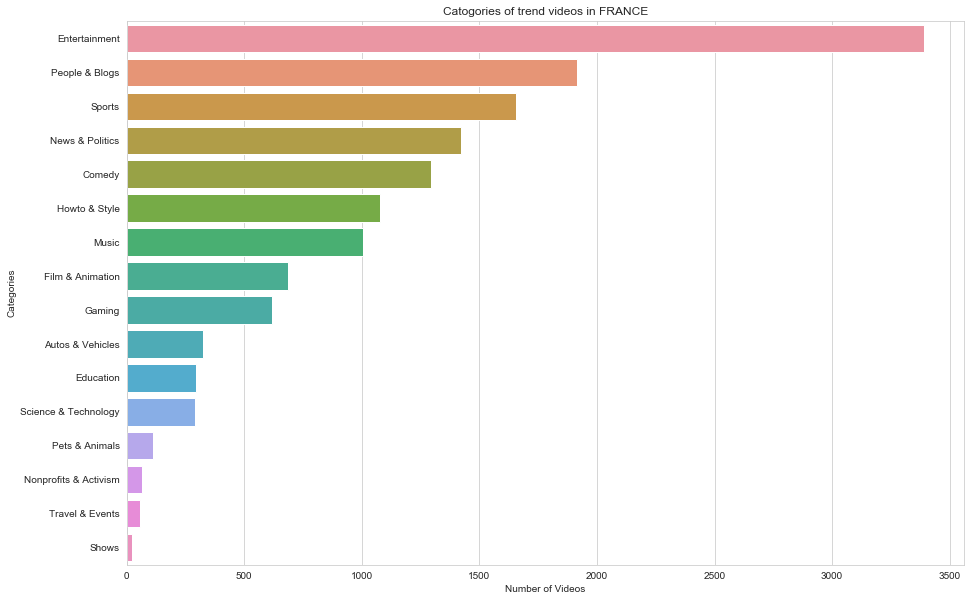

In [16]:
cat_df_fr = my_df[my_df['country']=='FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in FRANCE")

In [17]:
publish_to_trend = {}
my_df_first = my_df_full.reset_index().drop_duplicates('video_id',keep ='first').set_index('video_id')
diff_first = (my_df_first['trending_date']).astype('datetime64[ns]')-my_df_first['publish_date'].astype('datetime64[ns]')

diff_first = diff_first.reset_index()
diff_first.columns = ['video_id','publish_to_trend']

for i, row in diff_first.iterrows():
    publish_to_trend[row['video_id']] = row['publish_to_trend'].days

my_df_last = my_df
diff_last = my_df['trending_date'].astype('datetime64[ns]')-my_df['publish_date'].astype('datetime64[ns]')
diff_last = diff_last.reset_index()
diff_last.columns = ['video_id','publish_to_trend_last']
my_df = my_df.reset_index()
my_df.insert(4,'publish_to_trend_last', diff_last['publish_to_trend_last'].astype('timedelta64[D]').astype(int))
my_df.insert(4, 'publish_to_trend', my_df['video_id'].map(publish_to_trend))
my_df.insert(4, 'trend_duration', 0)
my_df['trend_duration'] = (my_df['publish_to_trend_last']-my_df['publish_to_trend'])+1
my_df.set_index('video_id')[['publish_to_trend','trend_duration']].sort_values('trend_duration',ascending=False).head()

,publish_to_trend,trend_duration
video_id,,
BhIEIO0vaBE,1,36
2z3EUY1aXdY,0,36
NooW_RbfdWI,1,36
YtKap-E0OGM,0,35
tEnCoocmPQM,1,35


Text(0.5, 1.0, 'Category v/s Trending Duration')

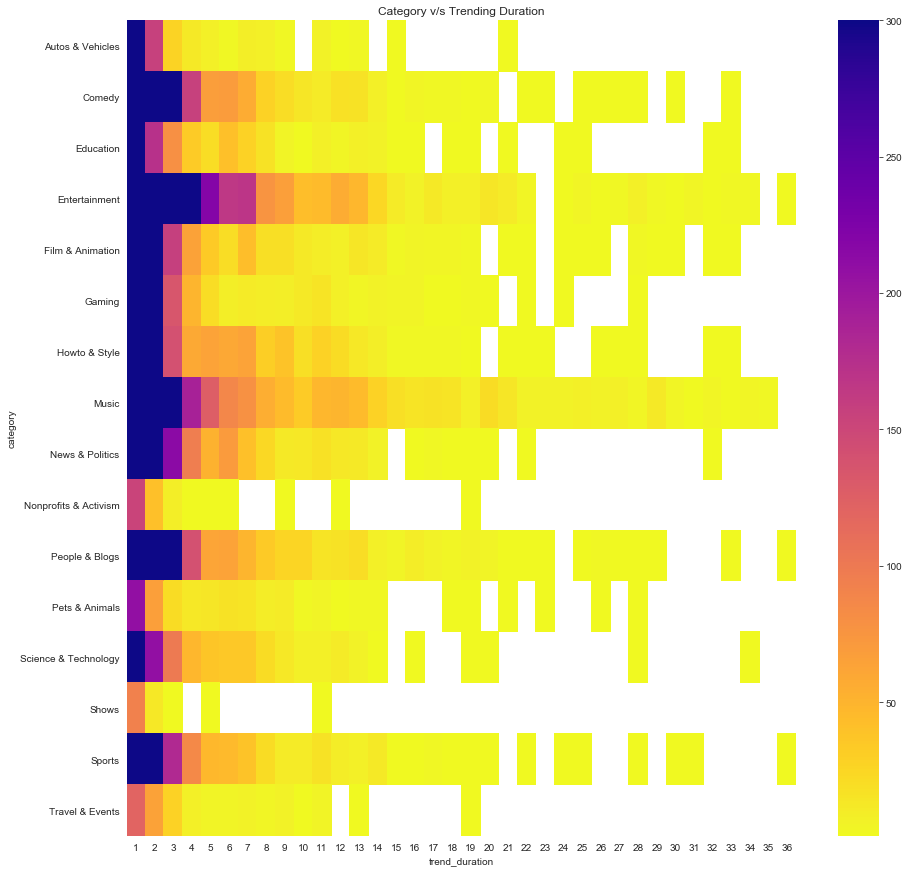

In [18]:
cat_trend_duration= my_df.groupby(['category','trend_duration']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))#You can Arrange The Size As Per Requirement
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category v/s Trending Duration")

Text(0.5, 1.0, 'Correlation between Days from Publish v/s Trend and Trending Duration')

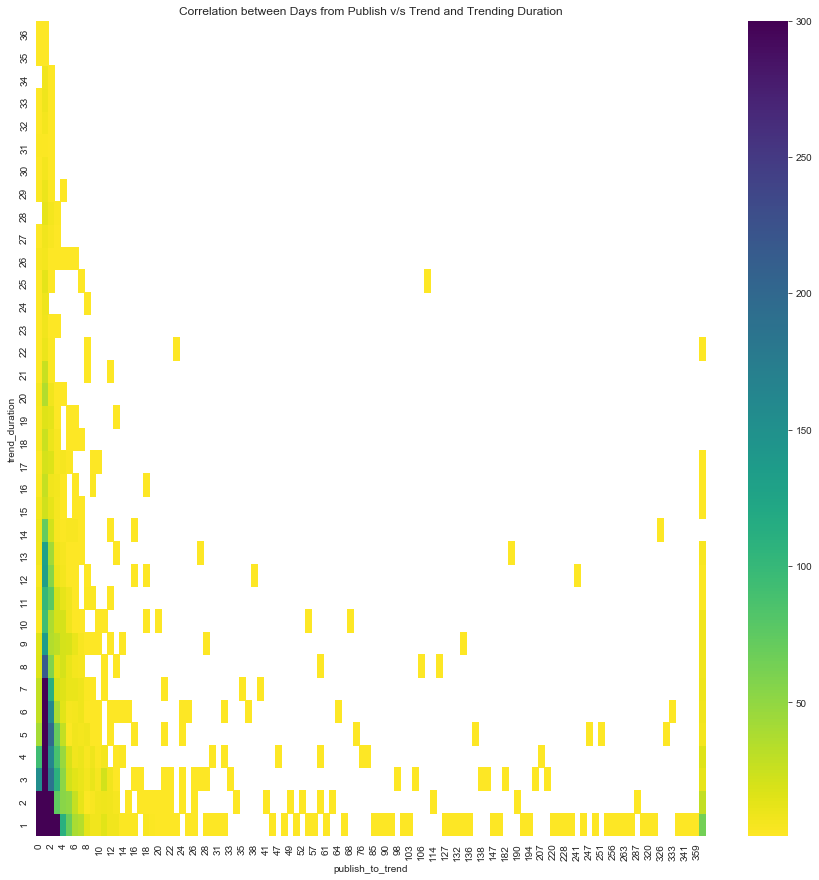

In [19]:
my_df['publish_to_trend'] = my_df['publish_to_trend'].clip(upper=365)
cat_trend_duration= my_df.groupby(['trend_duration','publish_to_trend']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cat_trend_duration, cmap='viridis_r')
ax.invert_yaxis()
plt.title("Correlation between Days from Publish v/s Trend and Trending Duration")

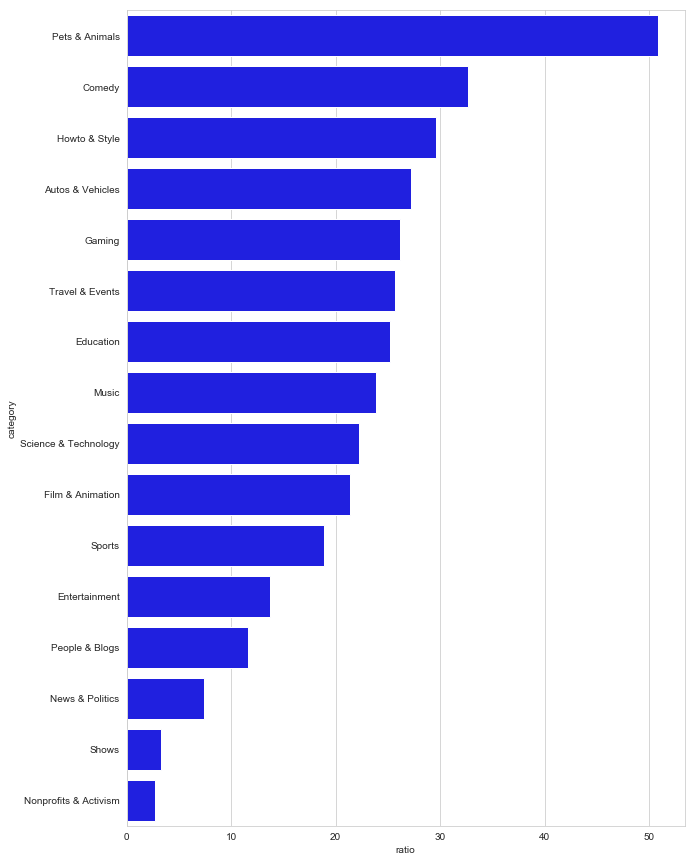

In [20]:
like_dislike_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

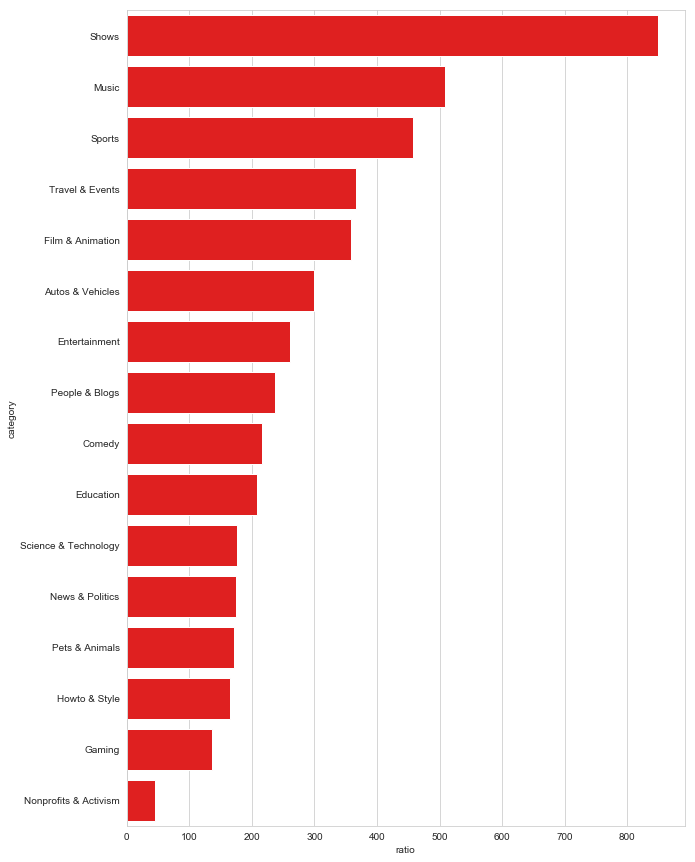

In [21]:
views_comment_ratio = my_df.groupby('category')['views'].agg('sum') / my_df.groupby('category')['comment_count'].agg('sum')
views_comment_ratio = views_comment_ratio.sort_values(ascending=False).reset_index()
views_comment_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=views_comment_ratio,
            label="Views-Comments Ratio", color="r")

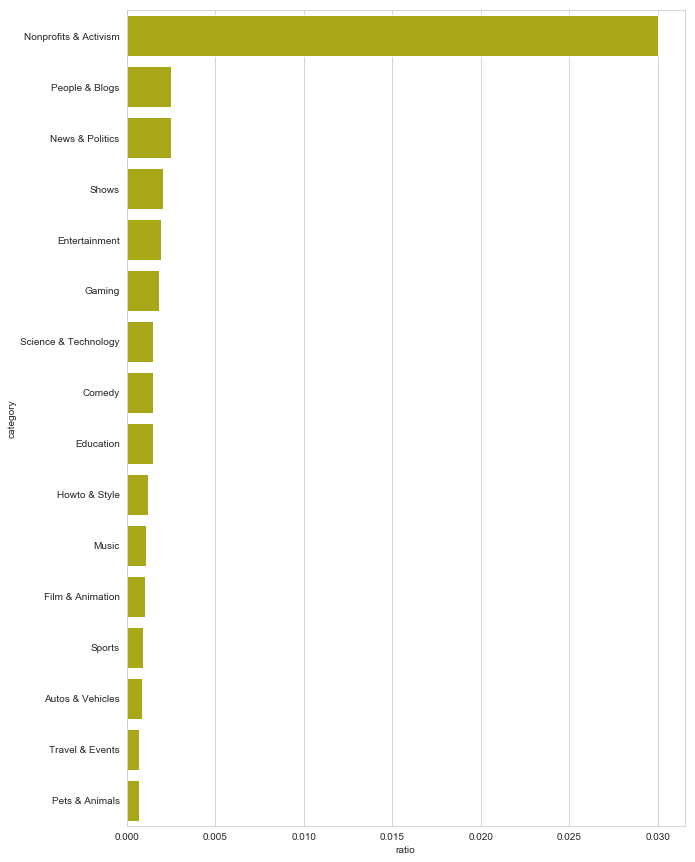

In [22]:
view_dislike_ratio = my_df.groupby('category')['dislikes'].agg('sum') / my_df.groupby('category')['views'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_dislike_ratio,
            label="Views-Dislikes Ratio", color="y")

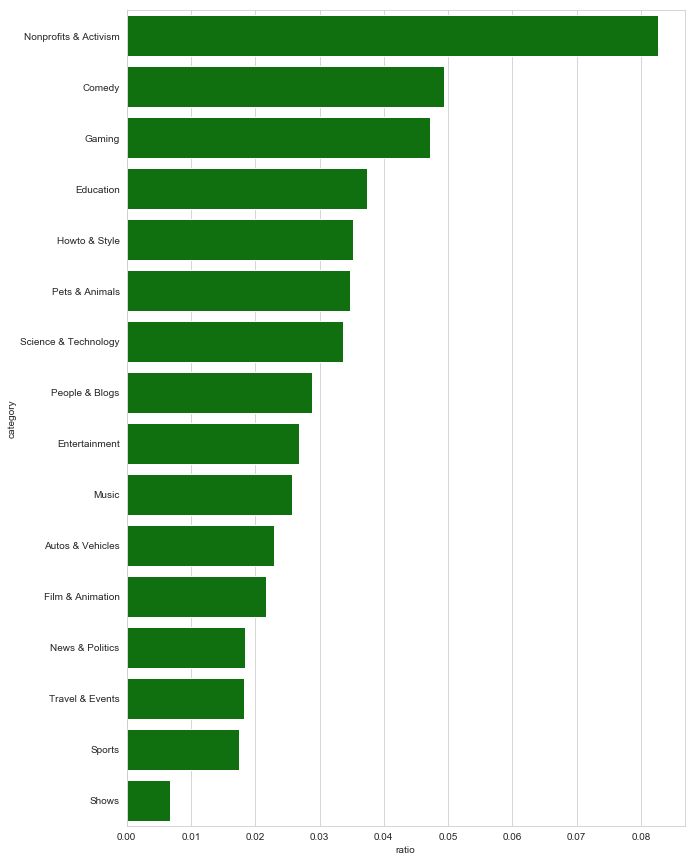

In [23]:
view_like_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['views'].agg('sum')
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_like_ratio,
            label="Views-Likes Ratio", color="g")

In [24]:
from wordcloud import WordCloud
import nltk
#nltk.download()
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [25]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Text(0.5, 1.0, 'Polarity of Categories in Youtube videos')

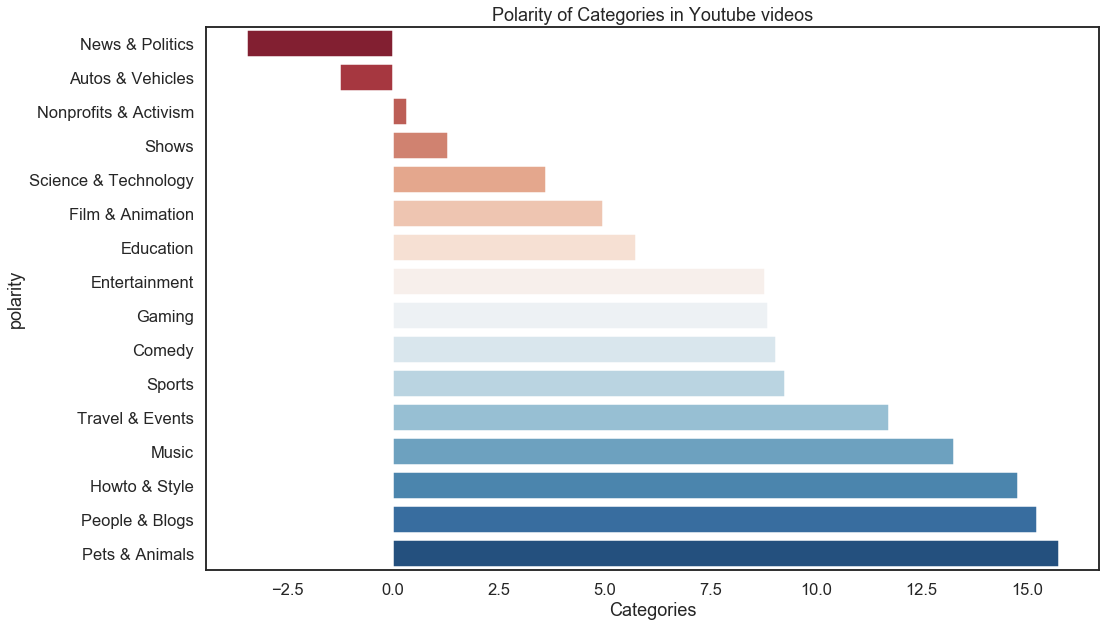

In [26]:
MAX_N = 1000

#remove all the stopwords from the text
en_stopwords = list(stopwords.words('english'))
de_stopwords = list(stopwords.words('german'))   
fr_stopwords = list(stopwords.words('french'))   
en_stopwords.extend(de_stopwords)
en_stopwords.extend(fr_stopwords)

polarities = list()

for cate in category_list:
    tags_word = my_df[my_df['category']==cate]['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
    tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
    word_tokens = word_tokenize(tags_word)
    filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]  
    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    hnhk = pd.DataFrame(word_dist.most_common(MAX_N),
                    columns=['Word', 'Frequency'])

    compound = .0
    for word in hnhk['Word'].head(MAX_N):
        compound += SentimentIntensityAnalyzer().polarity_scores(word)['compound']

    polarities.append(compound)

category_list = pd.DataFrame(category_list)
polarities = pd.DataFrame(polarities)
tags_sentiment = pd.concat([category_list,polarities],axis=1)
tags_sentiment.columns = ['category','polarity']
tags_sentiment=tags_sentiment.sort_values('polarity').reset_index()

plt.figure(figsize=(16,10))
sns.set(style="white",context="talk")
ax = sns.barplot(x=tags_sentiment['polarity'],y=tags_sentiment['category'], data=tags_sentiment,orient='h',palette="RdBu")
plt.xlabel("Categories")
plt.ylabel("polarity")
plt.title("Polarity of Categories in Youtube videos")

In [27]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

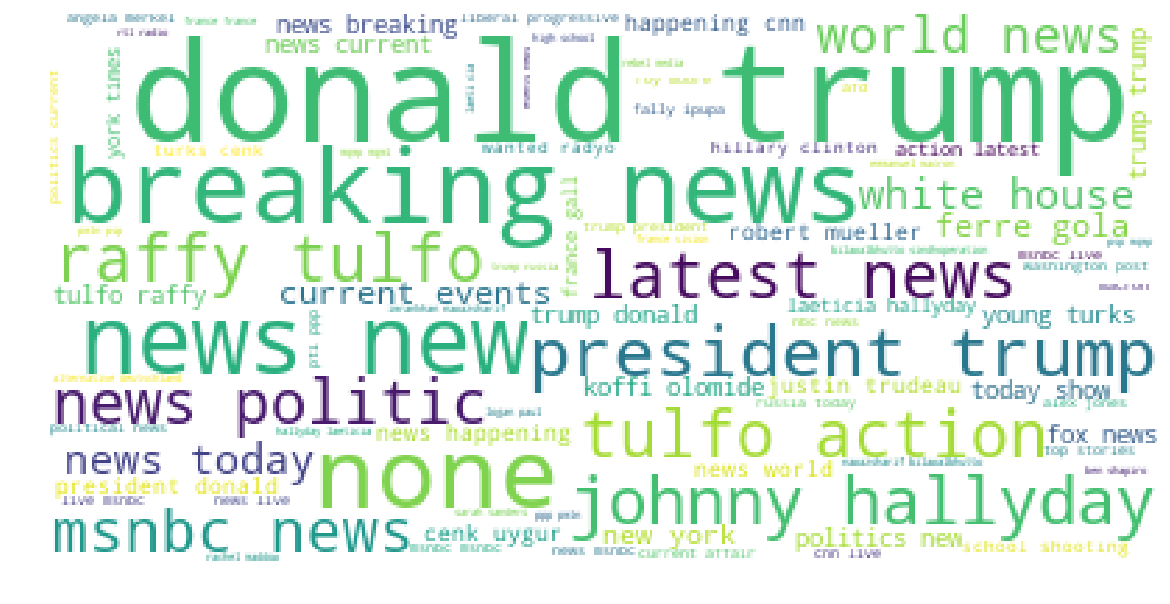

In [28]:
tags_word = my_df[my_df['category']=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

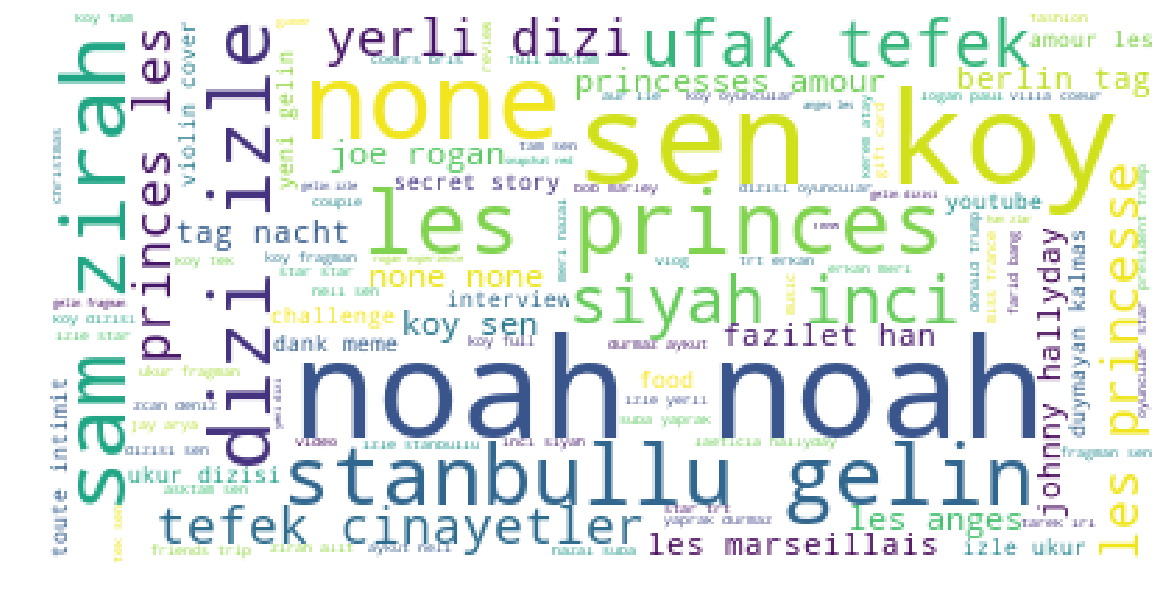

In [29]:
tags_word = my_df[my_df['category']=='People & Blogs']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

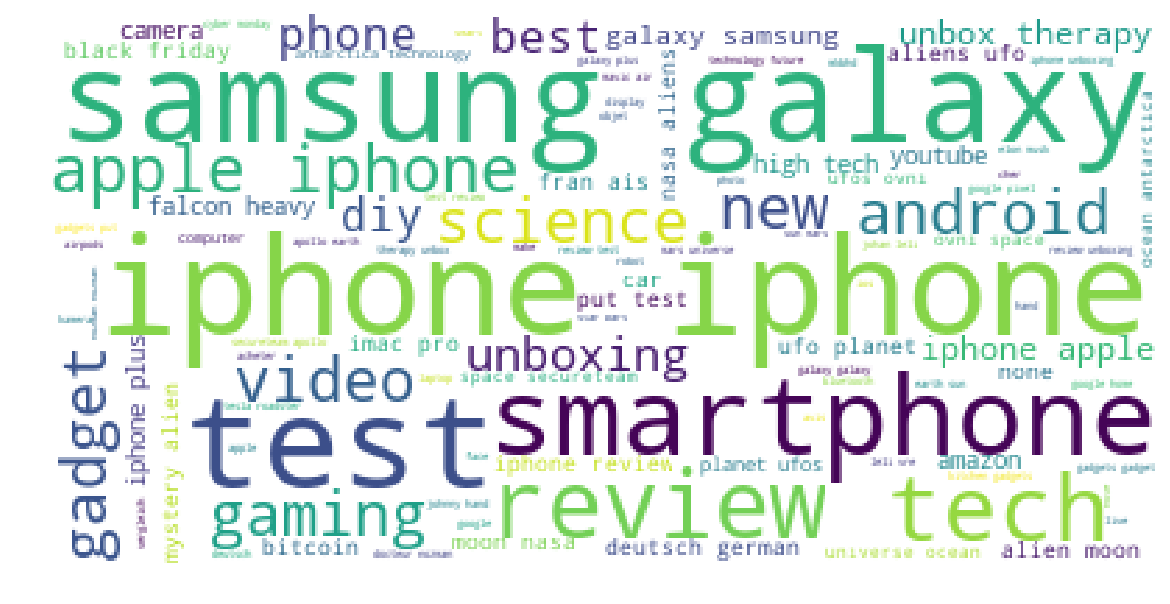

In [30]:
tags_word = my_df[my_df['category']=='Science & Technology']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

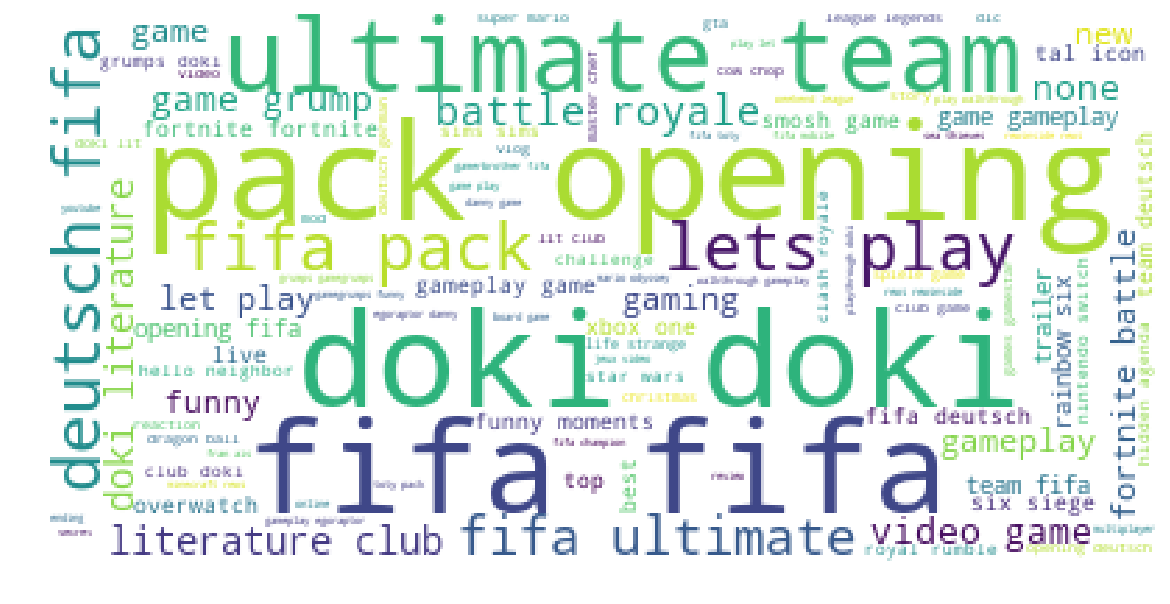

In [30]:
tags_word = my_df[my_df['category']=='Gaming']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

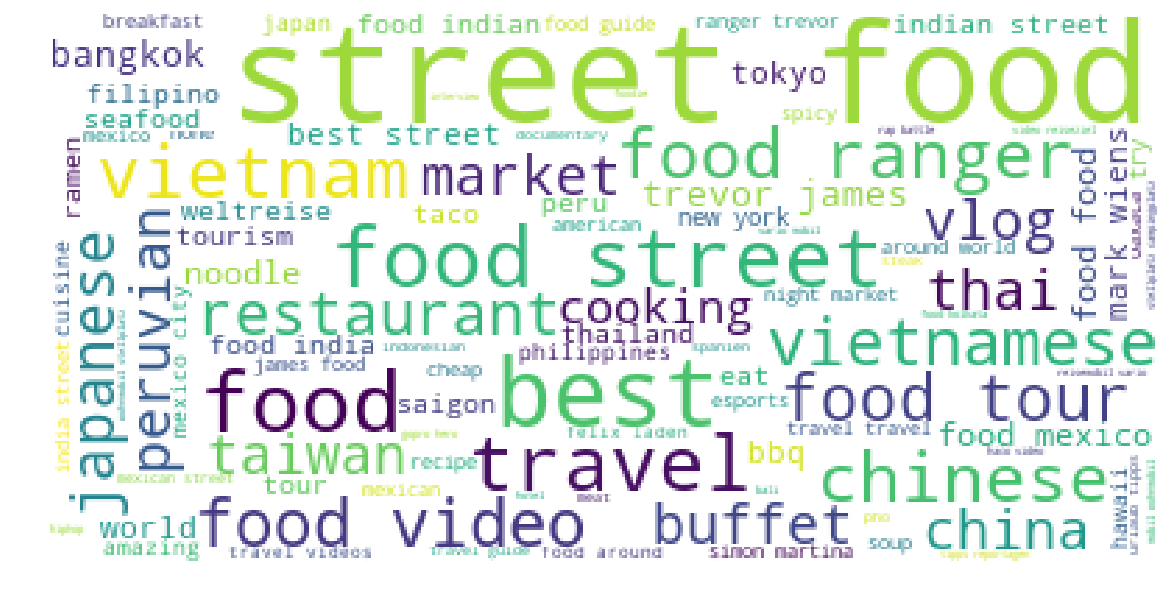

In [31]:
tags_word = my_df[my_df['category']=='Travel & Events']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

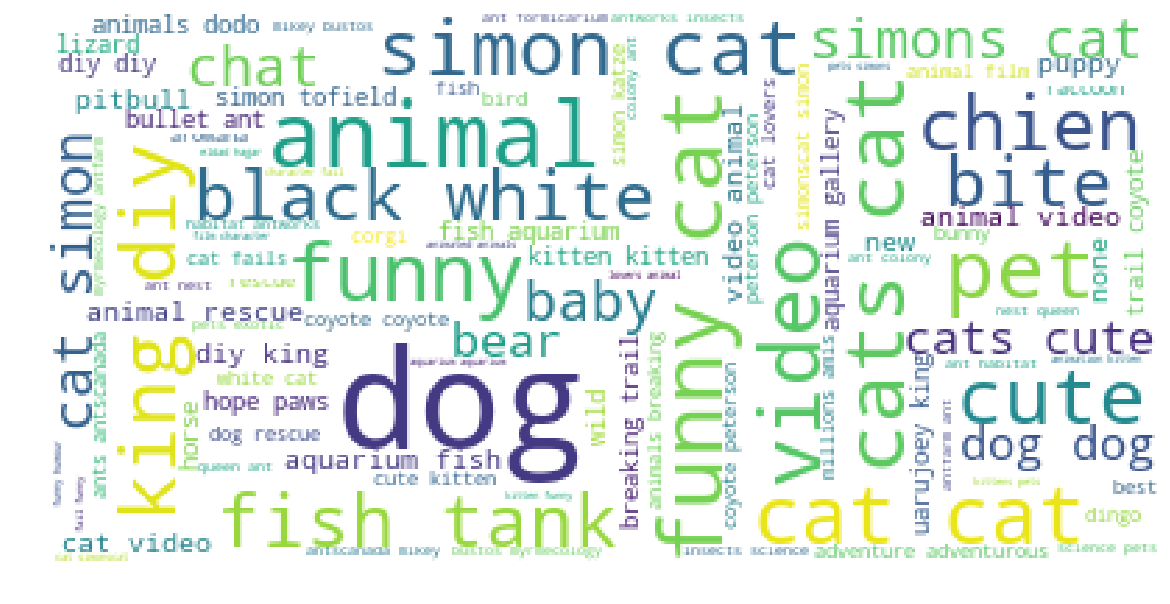

In [35]:
tags_word = my_df[my_df['category']=='Pets & Animals']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

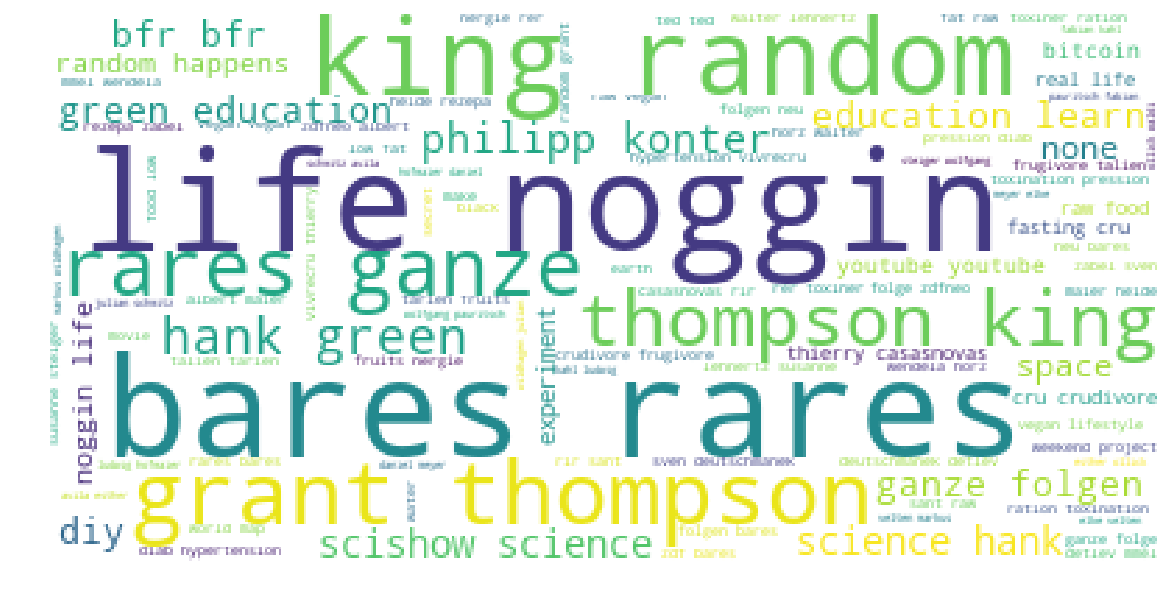

In [36]:
tags_word = my_df[my_df['category']=='Education']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

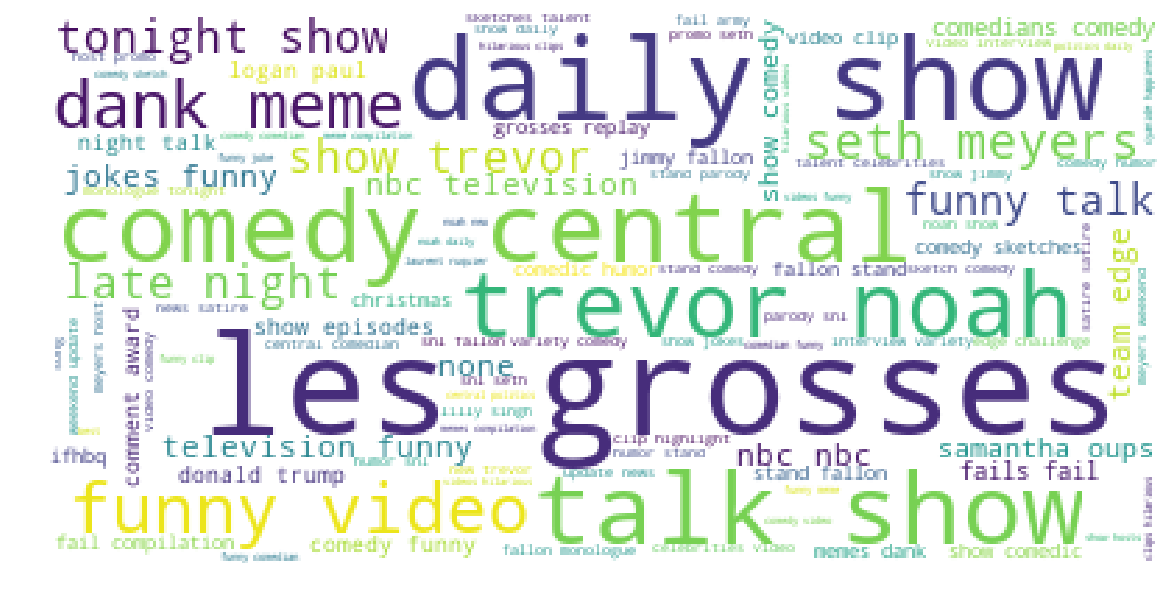

In [37]:
tags_word = my_df[my_df['category']=='Comedy']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

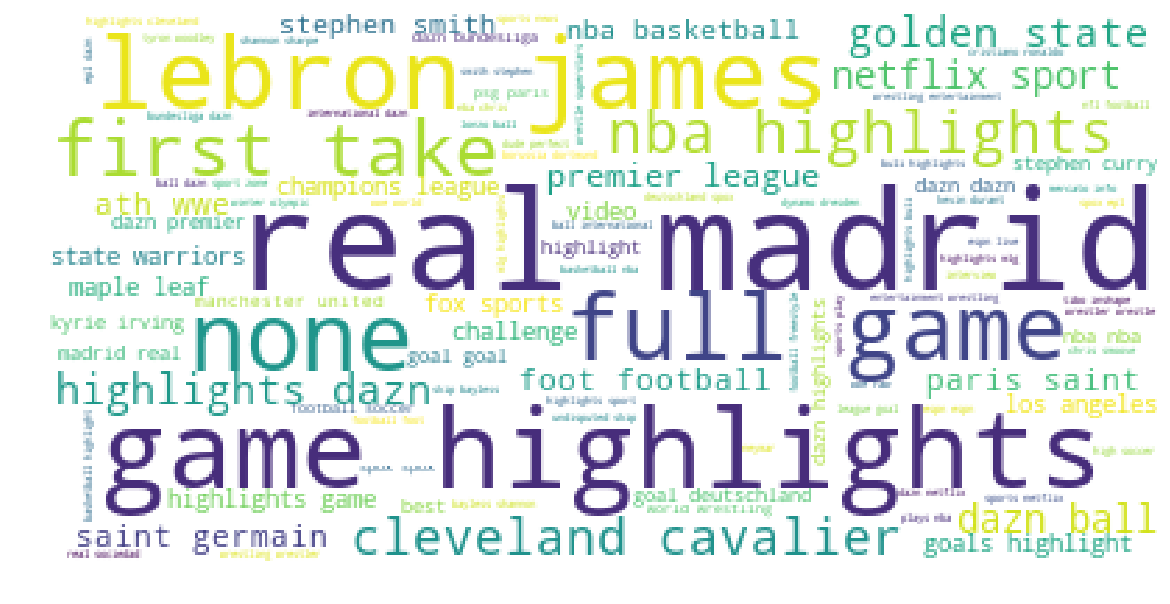

In [38]:
tags_word = my_df[my_df['category']=='Sports']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

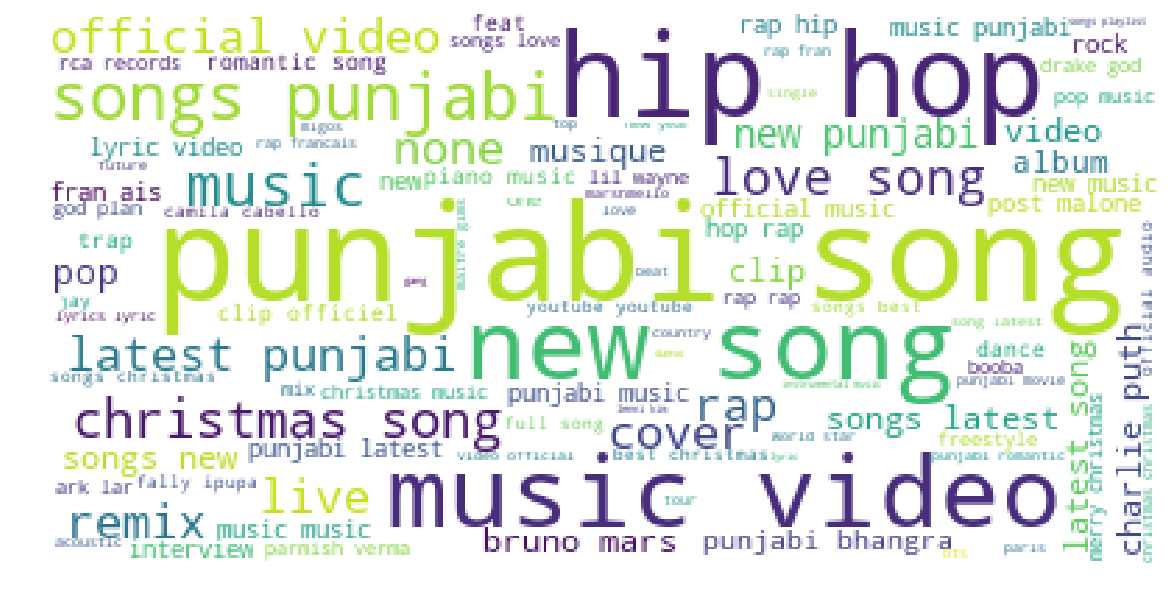

In [40]:
tags_word = my_df[my_df['category']=='Music']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

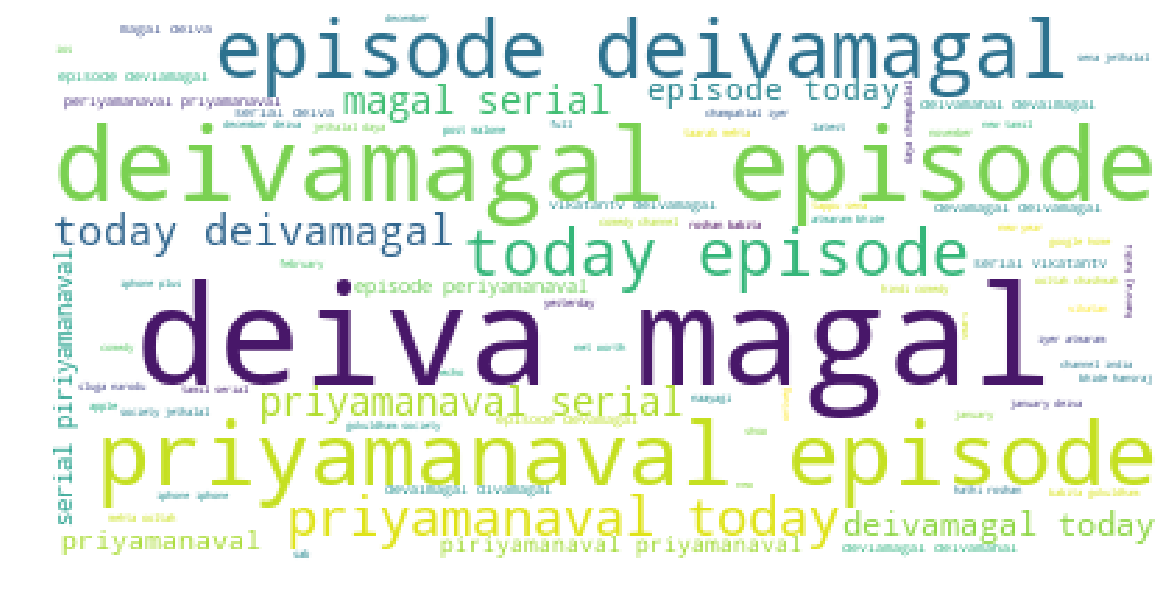

In [42]:
tags_word = my_df[my_df['category']=='Shows']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')

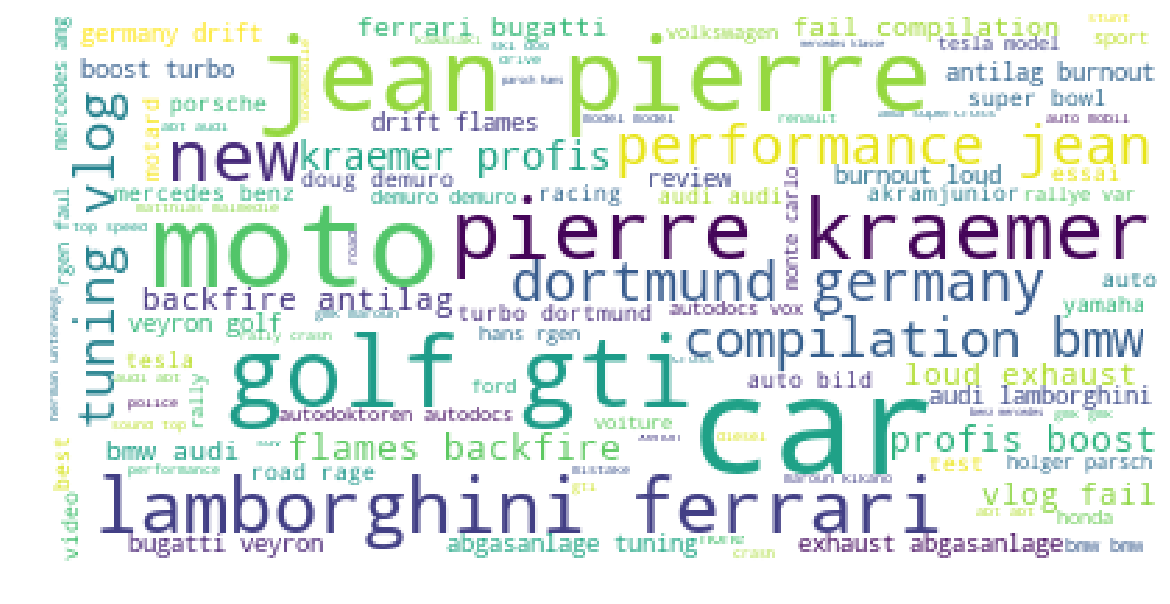

In [43]:
tags_word = my_df[my_df['category']=='Autos & Vehicles']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')